In [0]:
# bibliotheques

import keras
import tensorflow as tf
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
import matplotlib.pyplot as plt
import tqdm as tqdm
import tensorflow.keras.backend as K
import random as random

Using TensorFlow backend.


In [0]:
# variables

batch_size = 128  
num_classes = 10
epochs = 12

# couleurs

violet = (128/255, 39/255, 108/255)
orange = (255/255, 163/255, 0)

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
# ces fonctions permettent de rendre les donnees exploitables

def adapter_donnees_x(x_train, x_test):
    
    #pour avoir 4 dimensions
    
    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    # pour avoir que des valeurs [0,1]

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')
    
    return(x_train, x_test, input_shape)


def adapter_donnees_y(y_train, y_test):
    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(y_train, num_classes)
    y_test = keras.utils.to_categorical(y_test, num_classes)
    
    return(y_train, y_test)

In [0]:
x_train, x_test, input_shape = adapter_donnees_x(x_train, x_test)
y_train, y_test = adapter_donnees_y(y_train, y_test)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
# pour créer et enregistrer le fichier model_PJT.h contenant la structure et l'entrainement
# du réseau de neuronne
"""

# creation du model

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

# entrainement du model

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


model.save('model_PJT.h5')

"""

"\n\n# creation du model\n\nmodel = Sequential()\nmodel.add(Conv2D(32, kernel_size=(3, 3),\n                 activation='relu',\n                 input_shape=input_shape))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(num_classes, activation='softmax'))\n\n# entrainement du model\n\nmodel.compile(loss=keras.losses.categorical_crossentropy,\n              optimizer=keras.optimizers.Adadelta(),\n              metrics=['accuracy'])\n\nmodel.fit(x_train, y_train,\n          batch_size=batch_size,\n          epochs=epochs,\n          verbose=1,\n          validation_data=(x_test, y_test))\nscore = model.evaluate(x_test, y_test, verbose=0)\nprint('Test loss:', score[0])\nprint('Test accuracy:', score[1])\n\n\nmodel.save('model_PJT.h5')\n\n"

In [0]:
model = tf.keras.models.load_model('model_PJT.h5')
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Test loss: 0.02741758475977258
Test accuracy: 0.991


In [0]:
# test de l'IA

y_pred = model.predict_classes(x_test)

# **Question 2 matrice de confusion**

In [0]:
y_test_f = np.argmax(y_test, axis=1)

con_mat = tf.math.confusion_matrix(labels=y_test_f, predictions=y_pred)
sess=tf.Session()
con_mat_r=sess.run(con_mat)
print(np.array(con_mat_r))

[[ 975    0    2    0    0    0    2    1    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   1    2 1025    0    1    0    0    3    0    0]
 [   0    0    2 1003    0    4    0    0    1    0]
 [   0    0    0    0  977    0    3    0    0    2]
 [   2    0    1    4    0  883    2    0    0    0]
 [   4    2    0    0    1    4  947    0    0    0]
 [   0    3    5    1    0    0    0 1016    1    2]
 [   3    1    2    0    0    0    1    2  963    2]
 [   1    2    0    1    7    6    0    5    1  986]]


# **Question 2 cross validation**

In [0]:
"""
(x_train, y_train), (x_test, y_test) = mnist.load_data()

def create_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape))
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  return (model)

from sklearn.model_selection import KFold

n_split=5
res=np.zeros((n_split,2))
n=0

for train_index,test_index in KFold(n_split).split(x_train):
  x_train1,x_test1=x_train[train_index],x_train[test_index]
  y_train1,y_test1=y_train[train_index],y_train[test_index]
  
  x_train2, x_test2, input_shape = adapter_donnees_x(x_train1,x_test1)
  y_train2, y_test2 = adapter_donnees_y(y_train1,y_test1)
  model=create_model()
  model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])

  model.fit(x_train2, y_train2,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test2, y_test2))
  
  #print('Model evaluation ',model.evaluate(x_test2,y_test2))
  res[n,0],res[n,1]=model.evaluate(x_test2,y_test2)
  n=n+1
print(res)

"""

"\n(x_train, y_train), (x_test, y_test) = mnist.load_data()\n\ndef create_model():\n  model = Sequential()\n  model.add(Conv2D(32, kernel_size=(3, 3),\n                  activation='relu',\n                  input_shape=input_shape))\n  model.add(Conv2D(64, (3, 3), activation='relu'))\n  model.add(MaxPooling2D(pool_size=(2, 2)))\n  model.add(Dropout(0.25))\n  model.add(Flatten())\n  model.add(Dense(128, activation='relu'))\n  model.add(Dropout(0.5))\n  model.add(Dense(num_classes, activation='softmax'))\n  return (model)\n\nfrom sklearn.model_selection import KFold\n\nn_split=5\nres=np.zeros((n_split,2))\nn=0\n\nfor train_index,test_index in KFold(n_split).split(x_train):\n  x_train1,x_test1=x_train[train_index],x_train[test_index]\n  y_train1,y_test1=y_train[train_index],y_train[test_index]\n  \n  x_train2, x_test2, input_shape = adapter_donnees_x(x_train1,x_test1)\n  y_train2, y_test2 = adapter_donnees_y(y_train1,y_test1)\n  model=create_model()\n  model.compile(loss=keras.losses.cat

# **Question 3**

In [0]:
# correlation softmax
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test, input_shape = adapter_donnees_x(x_train, x_test)

y_pred_m = model.predict(x_test)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


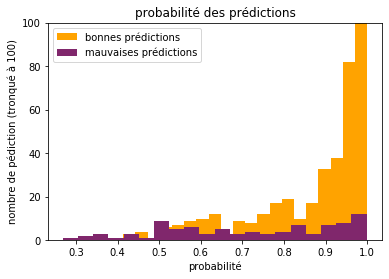

In [0]:
bonne_pred = []
mauvaise_pred = []
for k in range(y_pred.shape[0]):
  if y_pred[k] == y_test_f[k]:
    bonne_pred.append(max(y_pred_m[k]))
  else:
    mauvaise_pred.append(max(y_pred_m[k]))

plt.figure()
plt.title('probabilité des prédictions')
plt.ylim(0,100)
plt.xlabel('probabilité')
plt.ylabel('nombre de pédiction (tronqué à 100)')
plt.hist(bonne_pred,color=orange,bins=20, label='bonnes prédictions')
plt.hist(mauvaise_pred,color=violet,bins=20, label='mauvaises prédictions')
plt.legend()
plt.show()

**seuil de confinance à 90%, 95%, 99% pour le neuronne**


In [0]:
for indice_conf in [0.90,0.95,0.99]:
  mat_conf_90 = np.zeros((2,2))
  a,b,c,d = 0,0,0,0
  for k in bonne_pred:
    if k<indice_conf:
      b+=1 #bonne prediction rejetée à tort
    else:
      a+=1 #bonne prediction gardée
  for k in mauvaise_pred:
    if k<indice_conf:
      d+=1 #mauvaise prediction rejetée
    else:
      c+=1 #mauvaise prediction gardée à tort

  print('la matrice de confusion pour seuil de confiance =',indice_conf,'est')
  print(np.array([[a,b],[c,d]]))

la matrice de confusion pour seuil de confiance = 0.9 est
[[9742  168]
 [  25   65]]
la matrice de confusion pour seuil de confiance = 0.95 est
[[9669  241]
 [  15   75]]
la matrice de confusion pour seuil de confiance = 0.99 est
[[9416  494]
 [   6   84]]


# **Question 4 nouveau reseau avec 8 classes**

In [0]:
# variables
new_num_classes = 8

#importation de la dataset et elimination des classes 2 et 4

(x_train_8, y_train_8), (x_test_8, y_test_8) = mnist.load_data()

mask_train = np.isin(y_train_8, [2, 4], invert=True)
y_train_8 = y_train_8[mask_train]
x_train_8 = x_train_8[mask_train]

mask_test = np.isin(y_test_8, [2,4], invert=True)
y_test_8 = y_test_8[mask_test]
x_test_8 = x_test_8[mask_test]

# adaptation des donnees 

x_train_8, x_test_8, input_shape = adapter_donnees_x(x_train_8, x_test_8)
y_train_8, y_test_8 = adapter_donnees_y(y_train_8, y_test_8)

x_train shape: (48200, 28, 28, 1)
48200 train samples
7986 test samples


In [0]:
# creation du model
"""
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))


# entrainement du model

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train_8, y_train_8,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test_8, y_test_8))
score = model.evaluate(x_test_8, y_test_8, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])



model.save('model_PJT_8.h5')

"""

"\nmodel = Sequential()\nmodel.add(Conv2D(32, kernel_size=(3, 3),\n                 activation='relu',\n                 input_shape=input_shape))\nmodel.add(Conv2D(64, (3, 3), activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2, 2)))\nmodel.add(Dropout(0.25))\nmodel.add(Flatten())\nmodel.add(Dense(128, activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(num_classes, activation='softmax'))\n\n\n# entrainement du model\n\nmodel.compile(loss=keras.losses.categorical_crossentropy,\n              optimizer=keras.optimizers.Adadelta(),\n              metrics=['accuracy'])\n\nmodel.fit(x_train_8, y_train_8,\n          batch_size=batch_size,\n          epochs=epochs,\n          verbose=1,\n          validation_data=(x_test_8, y_test_8))\nscore = model.evaluate(x_test_8, y_test_8, verbose=0)\nprint('Test loss:', score[0])\nprint('Test accuracy:', score[1])\n\n\n\nmodel.save('model_PJT_8.h5')\n\n"

In [0]:
model_8 = tf.keras.models.load_model('model_PJT_8.h5')

In [0]:
# Matrice de confusion avec 8 classes

y_pred_8 = model_8.predict_classes(x_test_8)

y_test_f_8 = np.argmax(y_test_8, axis=1)

con_mat = tf.math.confusion_matrix(labels=y_test_f_8, predictions=y_pred_8)
sess=tf.Session()
con_mat_r=sess.run(con_mat)
print(np.array(con_mat_r))

[[ 977    0    0    0    0    0    1    1    1    0]
 [   0 1134    0    1    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   0    0    0 1001    0    6    0    2    1    0]
 [   0    0    0    0    0    0    0    0    0    0]
 [   2    0    0    2    0  886    2    0    0    0]
 [   5    2    0    1    0    1  946    0    2    1]
 [   0    2    0    1    0    0    0 1024    1    0]
 [   3    1    0    0    0    0    0    2  965    3]
 [   1    2    0    1    0    2    1    5    1  996]]


In [0]:
#  Analyse de resultats avec des classes inconues

(x_train_24, y_train_24), (x_test_24, y_test_24) = mnist.load_data()

mask_train = np.isin(y_train_24, [2, 4], invert=False)
y_train_24 = y_train_24[mask_train]
x_train_24 = x_train_24[mask_train]

mask_test = np.isin(y_test_24, [2,4], invert=False)
y_test_24 = y_test_24[mask_test]
x_test_24 = x_test_24[mask_test]


x_train_24, x_test_24, input_shape = adapter_donnees_x(x_train_24, x_test_24)
y_train_24, y_test_24 = adapter_donnees_y(y_train_24, y_test_24)


y_pred_24 = model_8.predict_classes(x_test_24)

y_test_24 = np.argmax(y_test_24, axis=1)

x_train shape: (11800, 28, 28, 1)
11800 train samples
2014 test samples


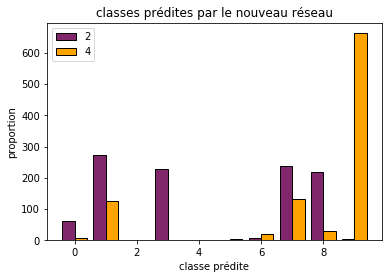

In [0]:
y_pred_2, y_pred_4 = [], []

for k in range(y_test_24.shape[0]):
    if y_test_24[k] == 2:
        y_pred_2.append(y_pred_24[k])
    if y_test_24[k] == 4:
        y_pred_4.append(y_pred_24[k])

plt.figure()
plt.title('classes prédites par le nouveau réseau')
plt.hist([y_pred_2, y_pred_4], color=[violet, orange], edgecolor='black',
         label=['2', '4'], bins=range(11), align='left')
plt.xlabel('classe prédite')
plt.ylabel('proportion')
plt.legend()
plt.show()

# Question 4 : Évaluation de la première méthode

In [0]:
y_pred_24 = model_8.predict(x_test_24)

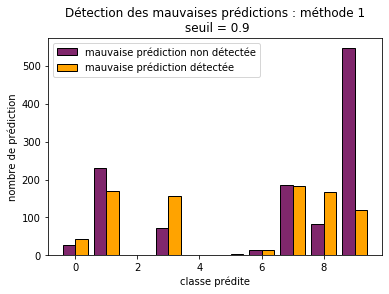

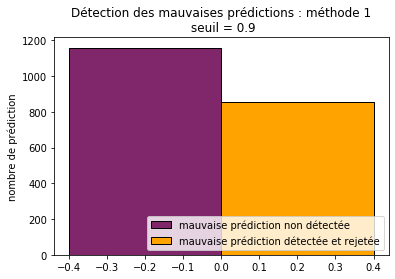

43 % de mauvaise prédictions détectées
57 % de mauvaise prédictions non détectées

 



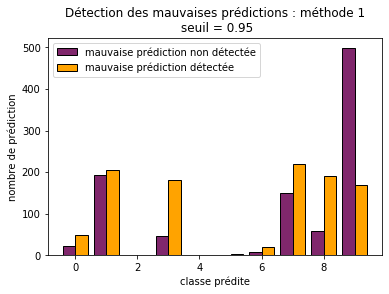

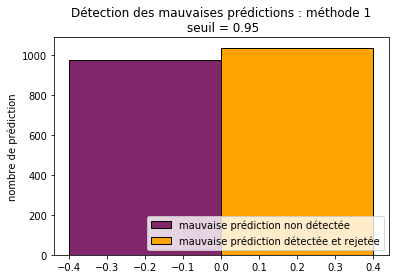

51 % de mauvaise prédictions détectées
49 % de mauvaise prédictions non détectées

 



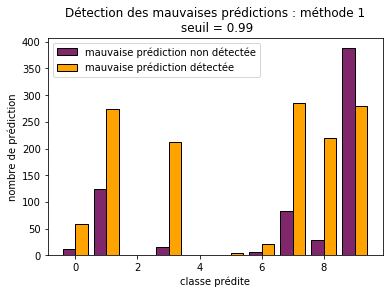

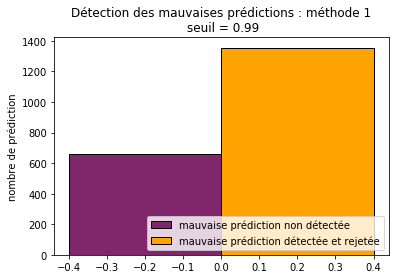

67 % de mauvaise prédictions détectées
33 % de mauvaise prédictions non détectées

 



In [0]:
seuil = [0.90, 0.95, 0.99]

for s in seuil:
  mauvaise_pred_rejete, mauvaise_pred_garde, nb_rejete, nb_nondetect = [],[],[],[]
  for k in y_pred_24:
    if max(k)>s:
      mauvaise_pred_garde.append(np.argmax(k))
      nb_nondetect.append(0)
    else:
      mauvaise_pred_rejete.append(np.argmax(k))
      nb_rejete.append(1)


  plt.figure()
  plt.title('Détection des mauvaises prédictions : méthode 1\n seuil = ' + str(s))
  plt.hist([mauvaise_pred_garde, mauvaise_pred_rejete], color=[violet, orange], edgecolor='black',
          label=['mauvaise prédiction non détectée', 'mauvaise prédiction détectée'], 
          bins=range(11), align='left')
  plt.xlabel('classe prédite')
  plt.ylabel('nombre de prédiction')
  plt.legend()
  plt.show()


  plt.figure()
  plt.title('Détection des mauvaises prédictions : méthode 1\n seuil = ' + str(s))
  plt.hist([nb_nondetect, nb_rejete], color=[violet, orange], edgecolor='black',
          label=['mauvaise prédiction non détectée', 'mauvaise prédiction détectée et rejetée'], 
          bins=range(2), align='left')
  plt.ylabel('nombre de prédiction')
  plt.legend(loc=4)
  plt.show()
  print(round(100*len(mauvaise_pred_rejete)/(len(mauvaise_pred_garde + mauvaise_pred_rejete))),'% de mauvaise prédictions détectées')
  print(round(100*len(mauvaise_pred_garde)/(len(mauvaise_pred_garde + mauvaise_pred_rejete))),'% de mauvaise prédictions non détectées')
  print('\n \n')

# Question 5 : Monte-Carlo droupout

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test, input_shape = adapter_donnees_x(x_train, x_test)
y_train, y_test = adapter_donnees_y(y_train, y_test)
model = tf.keras.models.load_model('model_PJT.h5')
y_pred = model.predict_classes(x_test)

f = K.function([model.layers[0].input, K.learning_phase()], [model.layers[-1].output])
my_output_fast = np.array([f((x_test, 1))[0] for i in tqdm.tqdm(range(100))])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


100%|██████████| 100/100 [00:07<00:00, 12.80it/s]


In [0]:
moyenne = np.mean(my_output_fast, axis=0)
ecart_type = np.std(my_output_fast, axis=0)

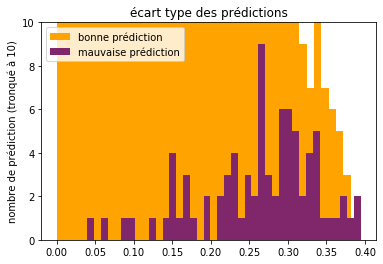

In [0]:
et_bonne_pred = []
et_mauvaise_pred = []
prediction = np.argmax(moyenne, axis=1)

for k in range(y_pred.shape[0]):
  if y_test_f[k] == prediction[k]:
    et_bonne_pred.append(ecart_type[k][prediction[k]])
  else:
    et_mauvaise_pred.append(ecart_type[k][prediction[k]])
  

tronque = 10
plt.figure()
plt.title('écart type des prédictions')
plt.ylim(0,tronque)
plt.hist(et_bonne_pred,color=orange,bins=40, label='bonne prédiction')
plt.hist(et_mauvaise_pred,color=violet,bins=40, label='mauvaise prédiction')
plt.ylabel('nombre de prédiction (tronqué à ' + str(tronque) + ')')
plt.legend(loc='upper left')
plt.show()

In [0]:
#  Analyse de resultats avec des classes inconues

(x_train_24, y_train_24), (x_test_24, y_test_24) = mnist.load_data()

mask_train = np.isin(y_train_24, [2, 4], invert=False)
y_train_24 = y_train_24[mask_train]
x_train_24 = x_train_24[mask_train]

mask_test = np.isin(y_test_24, [2,4], invert=False)
y_test_24 = y_test_24[mask_test]
x_test_24 = x_test_24[mask_test]

# adaptation des donnees 

x_train_24, x_test_24, input_shape = adapter_donnees_x(x_train_24, x_test_24)
y_train_24, y_test_24 = adapter_donnees_y(y_train_24, y_test_24)


y_pred_24 = model_8.predict_classes(x_test_24)

y_test_24 = np.argmax(y_test_24, axis=1)

# importation du model

model_8 = tf.keras.models.load_model('model_PJT_8.h5')

f = K.function([model_8.layers[0].input, K.learning_phase()], [model_8.layers[-1].output])
my_output_fast = np.array([f((x_test_24, 1))[0] for i in tqdm.tqdm(range(100))])

x_train shape: (11800, 28, 28, 1)
11800 train samples
2014 test samples


100%|██████████| 100/100 [00:01<00:00, 62.35it/s]


In [0]:
moyenne = np.mean(my_output_fast, axis=0)
ecart_type = np.std(my_output_fast, axis=0)

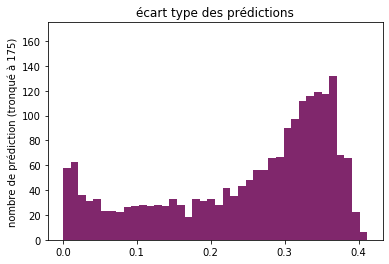

In [0]:
et_bonne_pred = []
et_mauvaise_pred = []
prediction = np.argmax(moyenne, axis=1)

for k in range(len(y_test_24)):
  if y_test_24[k] == prediction[k]:
    et_bonne_pred.append(ecart_type[k][prediction[k]])
  else:
    et_mauvaise_pred.append(ecart_type[k][prediction[k]])

tronque = 175
plt.figure()
plt.title('écart type des prédictions')
plt.ylim(0,tronque)
#plt.hist(et_bonne_pred,color=orange,bins=40, label='bonne prédiction')
plt.hist(et_mauvaise_pred,color=violet, bins=40, label='mauvaise prédiction')
plt.ylabel('nombre de prédiction (tronqué à '+str(tronque)+')')
#plt.legend(loc='upper left')
plt.show()

# Question 5 : Évaluation de la deuxième méthode

In [0]:
f = K.function([model_8.layers[0].input, K.learning_phase()], [model_8.layers[-1].output])
my_output_fast = np.array([f((x_test_24, 1))[0] for i in tqdm.tqdm(range(100))])

moyenne = np.mean(my_output_fast, axis=0)
ecart_type = np.std(my_output_fast, axis=0)
prediction = np.argmax(moyenne, axis=1)

100%|██████████| 100/100 [00:01<00:00, 65.01it/s]


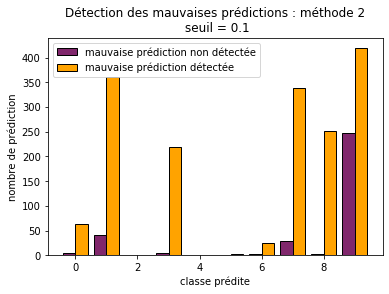

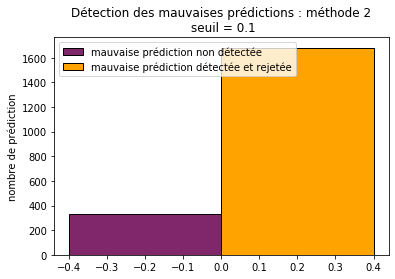

83 % de mauvaise prédictions détectées
17 % de mauvaise prédictions non détectées

 



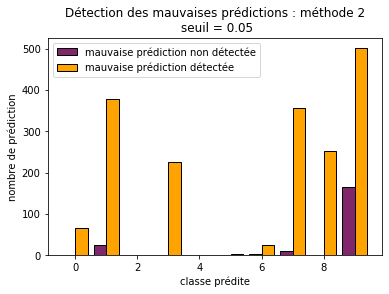

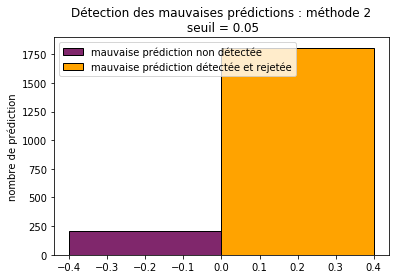

90 % de mauvaise prédictions détectées
10 % de mauvaise prédictions non détectées

 



In [0]:
seuil = [0.1, 0.05]
for s in seuil:
  mauvaise_pred_rejete, mauvaise_pred_garde, nb_rejete, nb_nondetect = [],[],[],[]

  for k in range(len(prediction)):
    if ecart_type[k][prediction[k]] < s:
      mauvaise_pred_garde.append(prediction[k])
      nb_nondetect.append(0)
    else:
      mauvaise_pred_rejete.append(prediction[k])
      nb_rejete.append(1)

  ####


  plt.figure()
  plt.title('Détection des mauvaises prédictions : méthode 2\n seuil = ' + str(s))
  plt.hist([mauvaise_pred_garde, mauvaise_pred_rejete], color=[violet, orange], edgecolor='black',
          label=['mauvaise prédiction non détectée', 'mauvaise prédiction détectée'], 
          bins=range(11), align='left')
  plt.xlabel('classe prédite')
  plt.ylabel('nombre de prédiction')
  plt.legend()
  plt.show()


  plt.figure()
  plt.title('Détection des mauvaises prédictions : méthode 2\n seuil = ' + str(s))
  plt.hist([nb_nondetect, nb_rejete], color=[violet, orange], edgecolor='black',
          label=['mauvaise prédiction non détectée', 'mauvaise prédiction détectée et rejetée'], 
          bins=range(2), align='left')
  plt.ylabel('nombre de prédiction')
  plt.legend(loc='upper left')
  plt.show()
  print(round(100*len(mauvaise_pred_rejete)/(len(mauvaise_pred_garde + mauvaise_pred_rejete))),'% de mauvaise prédictions détectées')
  print(round(100*len(mauvaise_pred_garde)/(len(mauvaise_pred_garde + mauvaise_pred_rejete))),'% de mauvaise prédictions non détectées')
  print('\n \n')

# Application de la méthode 2 au réseau principal

In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test, input_shape = adapter_donnees_x(x_train, x_test)
y_train, y_test = adapter_donnees_y(y_train, y_test)

model = tf.keras.models.load_model('model_PJT.h5')

f = K.function([model.layers[0].input, K.learning_phase()], [model.layers[-1].output])
my_output_fast = np.array([f((x_test, 1))[0] for i in tqdm.tqdm(range(100))])

moyenne = np.mean(my_output_fast, axis=0)
ecart_type = np.std(my_output_fast, axis=0)

et_bonne_pred = []
et_mauvaise_pred = []
prediction = np.argmax(moyenne, axis=1)

for k in range(y_pred.shape[0]):
  if y_test_f[k] == prediction[k]:
    et_bonne_pred.append(ecart_type[k][prediction[k]])
  else:
    et_mauvaise_pred.append(ecart_type[k][prediction[k]])
  

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


100%|██████████| 100/100 [00:07<00:00, 13.57it/s]


In [0]:
et_mauvaise_pred_sorted = sorted(et_mauvaise_pred)
seuil_1 = et_mauvaise_pred_sorted[0]
seuil_2 = et_mauvaise_pred_sorted[int(len(et_mauvaise_pred)/2)]
print(seuil_1, seuil_2)

def predire(img):
  
  # affiche l'image
  plt.figure()
  plt.imshow(img, cmap='Greys')
  plt.show()

  # pour avoir que des valeurs [0,1]
  img = img.astype('float32')
  img /= 255

  img = img.reshape(1, img_rows, img_cols, 1)
  
  my_output_fast = np.array([f((img, 1))[0] for i in (range(100))])

  moyenne = np.mean(my_output_fast, axis=0)
  prediction = np.argmax(moyenne, axis=1)
  ecart_type = np.std(my_output_fast, axis=0)[0][prediction]
  
  if ecart_type < seuil_1:
    certitude = 'forte'
  elif ecart_type > seuil_2:
    certitude = 'faible'
  else:
    certitude = 'moyenne'

  print('Le chiffre semble etre un ' +  str(prediction[0]) + ' avec une certitude ' + str(certitude))
  return(certitude)


0.06679919 0.2768595


In [0]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

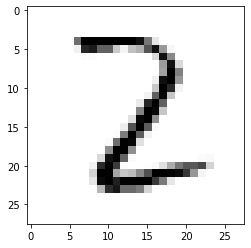

Le chiffre semble etre un 2 avec une certitude forte


In [0]:
predire(x_test[random.randint(0,x_test.shape[0])])

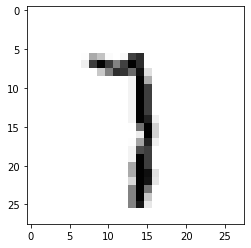

Le chiffre semble etre un 7 avec une certitude moyenne


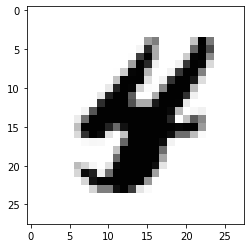

Le chiffre semble etre un 4 avec une certitude forte


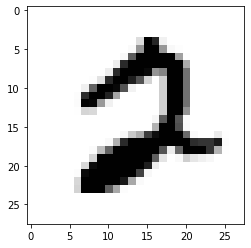

Le chiffre semble etre un 2 avec une certitude forte


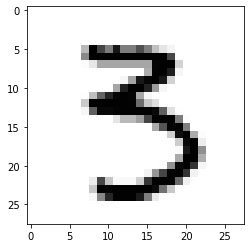

Le chiffre semble etre un 3 avec une certitude forte


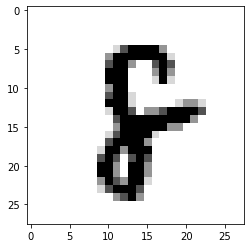

Le chiffre semble etre un 8 avec une certitude forte


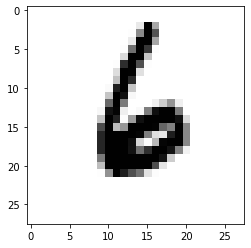

Le chiffre semble etre un 6 avec une certitude forte


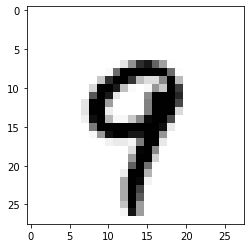

Le chiffre semble etre un 9 avec une certitude forte


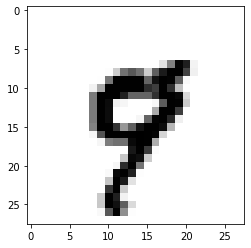

Le chiffre semble etre un 9 avec une certitude moyenne


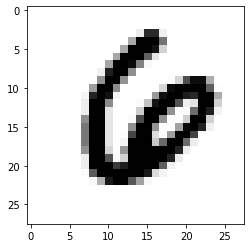

Le chiffre semble etre un 6 avec une certitude forte


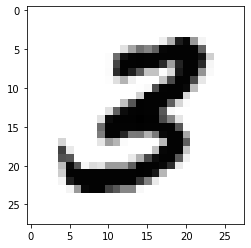

Le chiffre semble etre un 3 avec une certitude forte


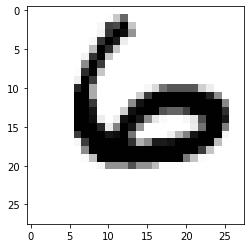

Le chiffre semble etre un 6 avec une certitude forte


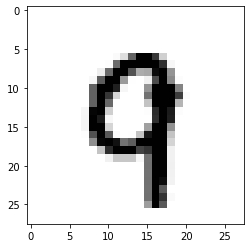

Le chiffre semble etre un 9 avec une certitude forte


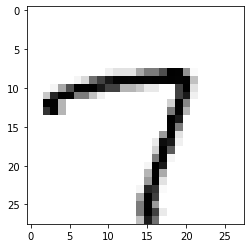

Le chiffre semble etre un 7 avec une certitude forte


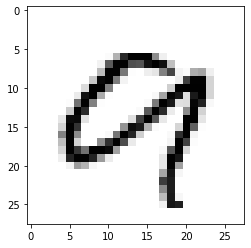

Le chiffre semble etre un 9 avec une certitude moyenne


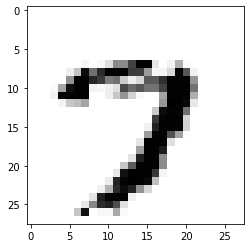

Le chiffre semble etre un 7 avec une certitude moyenne


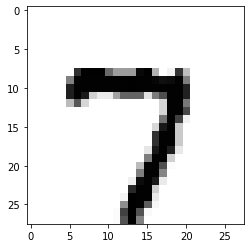

Le chiffre semble etre un 7 avec une certitude forte


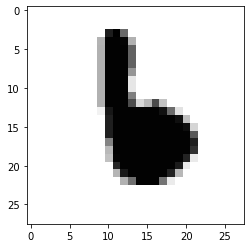

Le chiffre semble etre un 6 avec une certitude forte


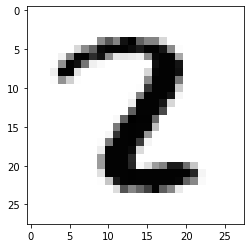

Le chiffre semble etre un 2 avec une certitude forte


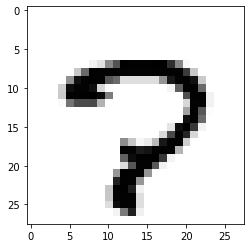

Le chiffre semble etre un 7 avec une certitude moyenne


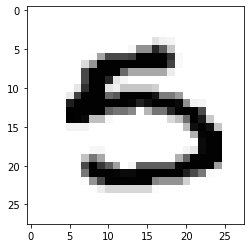

Le chiffre semble etre un 5 avec une certitude forte


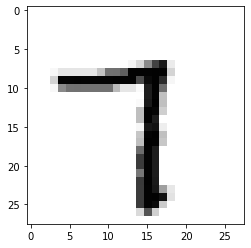

Le chiffre semble etre un 7 avec une certitude forte


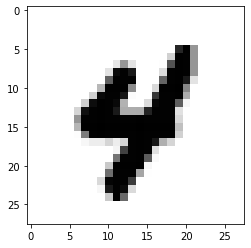

Le chiffre semble etre un 4 avec une certitude forte


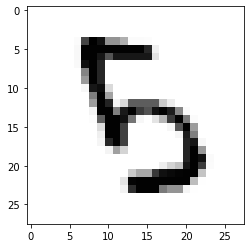

Le chiffre semble etre un 5 avec une certitude forte


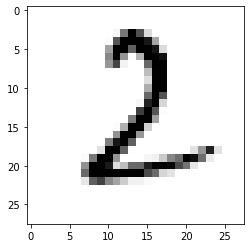

Le chiffre semble etre un 2 avec une certitude forte


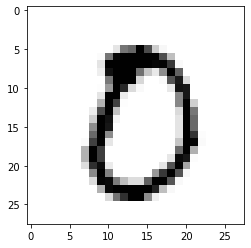

Le chiffre semble etre un 0 avec une certitude forte


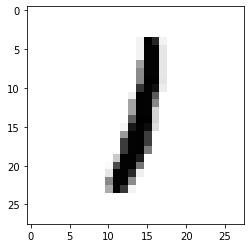

Le chiffre semble etre un 1 avec une certitude forte


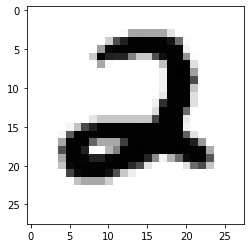

Le chiffre semble etre un 2 avec une certitude forte


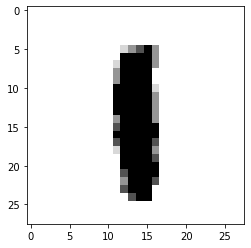

Le chiffre semble etre un 1 avec une certitude forte


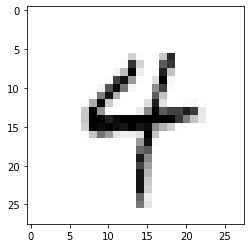

Le chiffre semble etre un 4 avec une certitude forte


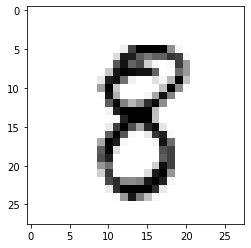

Le chiffre semble etre un 8 avec une certitude forte


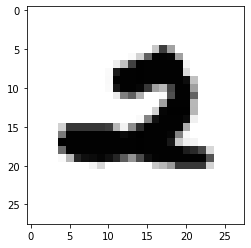

Le chiffre semble etre un 2 avec une certitude forte


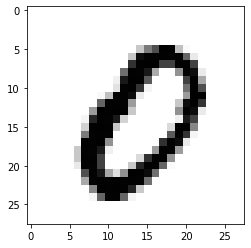

Le chiffre semble etre un 0 avec une certitude forte


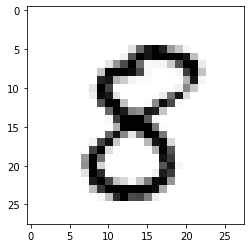

Le chiffre semble etre un 8 avec une certitude forte


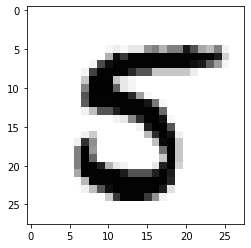

Le chiffre semble etre un 5 avec une certitude forte


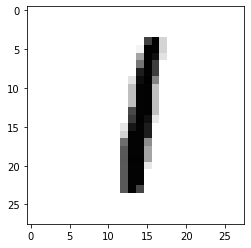

Le chiffre semble etre un 1 avec une certitude forte


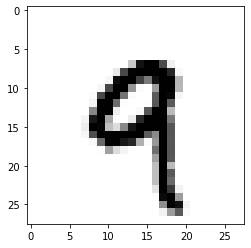

Le chiffre semble etre un 9 avec une certitude forte


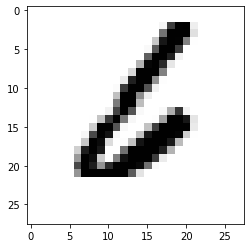

Le chiffre semble etre un 6 avec une certitude forte


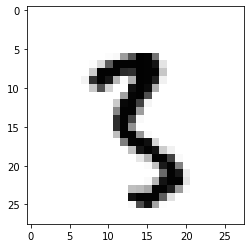

Le chiffre semble etre un 3 avec une certitude forte


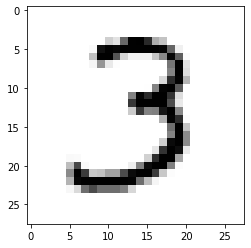

Le chiffre semble etre un 3 avec une certitude forte


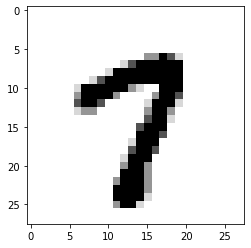

Le chiffre semble etre un 7 avec une certitude forte


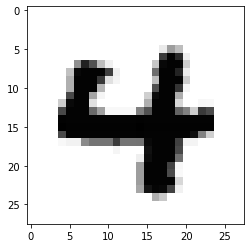

Le chiffre semble etre un 4 avec une certitude forte


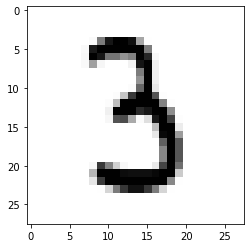

Le chiffre semble etre un 3 avec une certitude forte


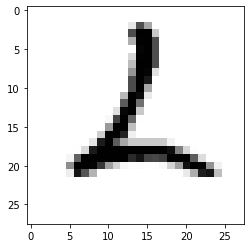

Le chiffre semble etre un 2 avec une certitude moyenne


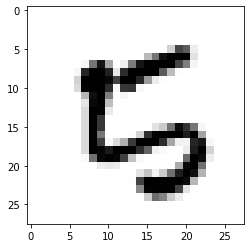

Le chiffre semble etre un 5 avec une certitude moyenne


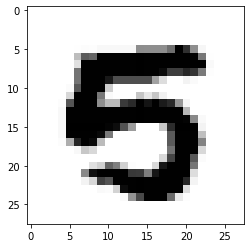

Le chiffre semble etre un 5 avec une certitude forte


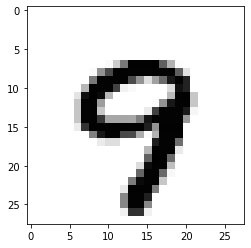

Le chiffre semble etre un 9 avec une certitude forte


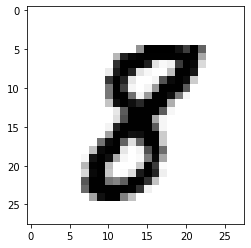

Le chiffre semble etre un 8 avec une certitude forte


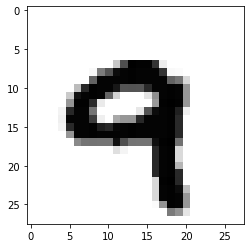

Le chiffre semble etre un 9 avec une certitude forte


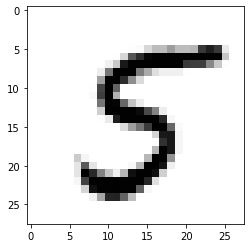

Le chiffre semble etre un 5 avec une certitude forte


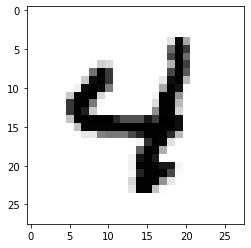

Le chiffre semble etre un 4 avec une certitude forte


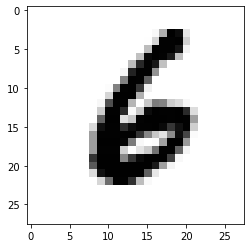

Le chiffre semble etre un 6 avec une certitude forte


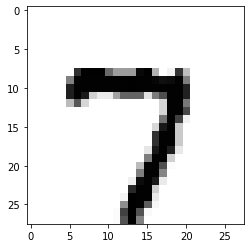

Le chiffre semble etre un 7 avec une certitude forte


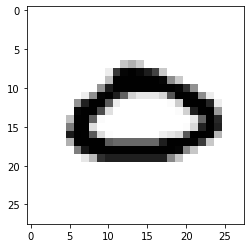

Le chiffre semble etre un 0 avec une certitude moyenne


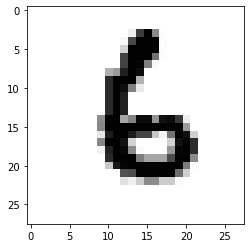

Le chiffre semble etre un 6 avec une certitude forte


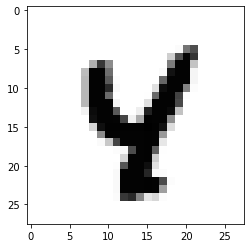

Le chiffre semble etre un 4 avec une certitude forte


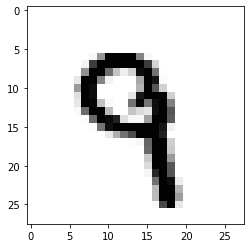

Le chiffre semble etre un 9 avec une certitude forte


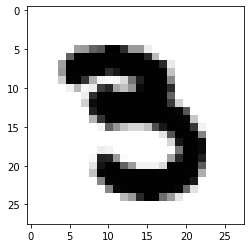

Le chiffre semble etre un 3 avec une certitude forte


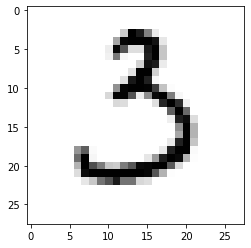

Le chiffre semble etre un 3 avec une certitude forte


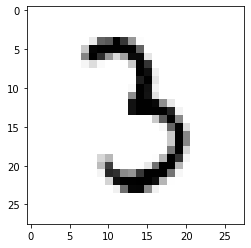

Le chiffre semble etre un 3 avec une certitude forte


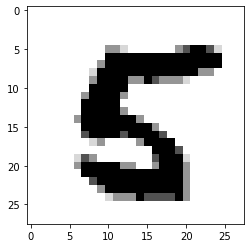

Le chiffre semble etre un 5 avec une certitude forte


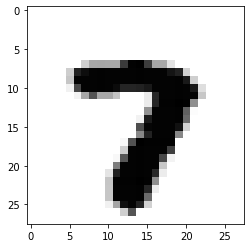

Le chiffre semble etre un 7 avec une certitude forte


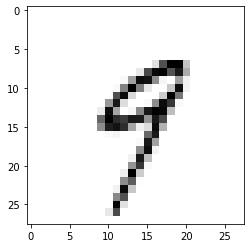

Le chiffre semble etre un 9 avec une certitude forte


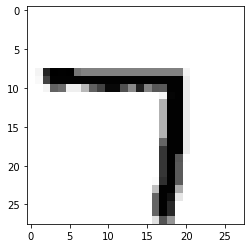

Le chiffre semble etre un 7 avec une certitude forte


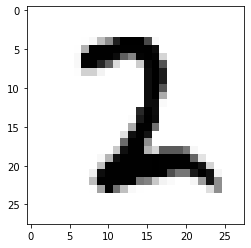

Le chiffre semble etre un 2 avec une certitude forte


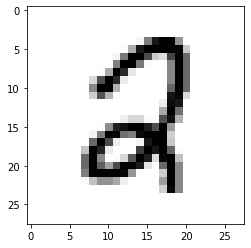

Le chiffre semble etre un 2 avec une certitude forte


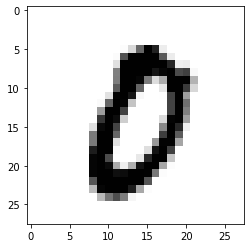

Le chiffre semble etre un 0 avec une certitude forte


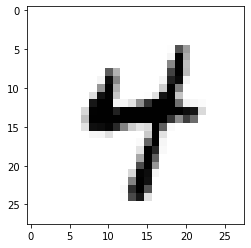

Le chiffre semble etre un 4 avec une certitude forte


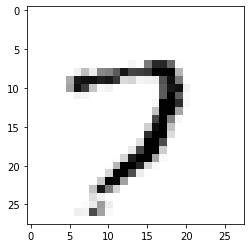

Le chiffre semble etre un 7 avec une certitude forte


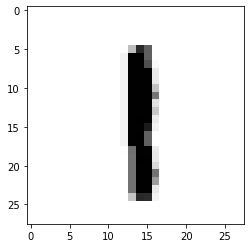

Le chiffre semble etre un 1 avec une certitude forte


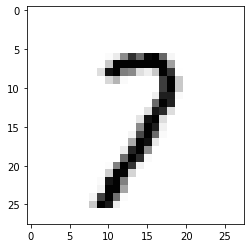

Le chiffre semble etre un 7 avec une certitude forte


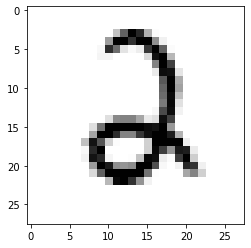

Le chiffre semble etre un 2 avec une certitude forte


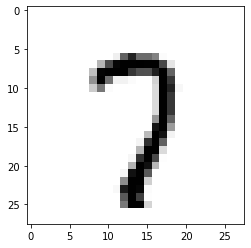

Le chiffre semble etre un 7 avec une certitude forte


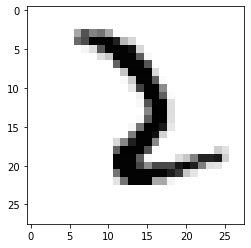

Le chiffre semble etre un 2 avec une certitude forte


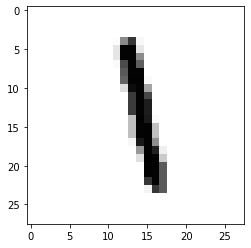

Le chiffre semble etre un 1 avec une certitude forte


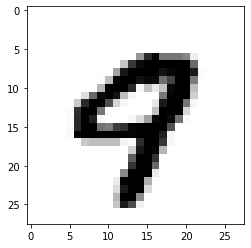

Le chiffre semble etre un 9 avec une certitude forte


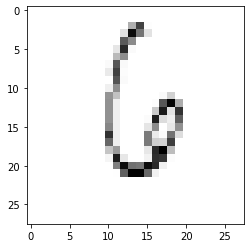

Le chiffre semble etre un 6 avec une certitude forte


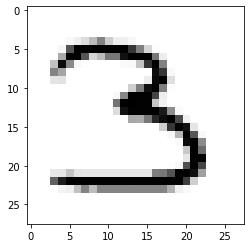

Le chiffre semble etre un 3 avec une certitude forte


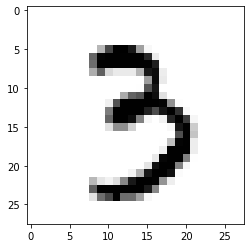

Le chiffre semble etre un 3 avec une certitude forte


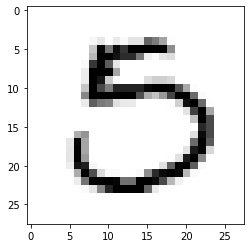

Le chiffre semble etre un 5 avec une certitude forte


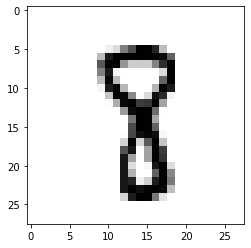

Le chiffre semble etre un 8 avec une certitude forte


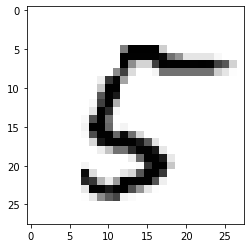

Le chiffre semble etre un 5 avec une certitude forte


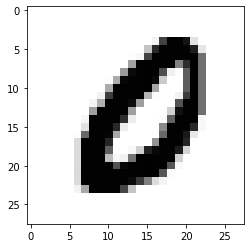

Le chiffre semble etre un 0 avec une certitude forte


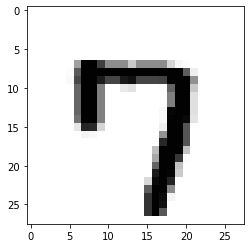

Le chiffre semble etre un 7 avec une certitude forte


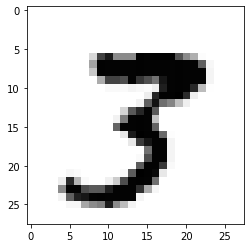

Le chiffre semble etre un 3 avec une certitude forte


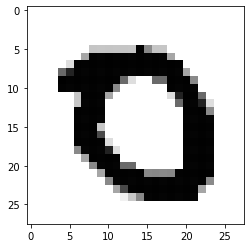

Le chiffre semble etre un 0 avec une certitude forte


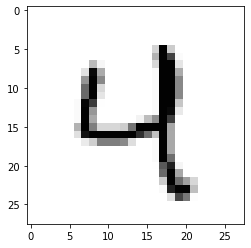

Le chiffre semble etre un 4 avec une certitude forte


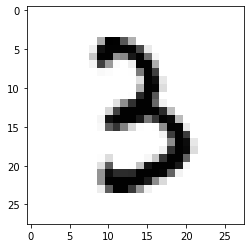

Le chiffre semble etre un 3 avec une certitude forte


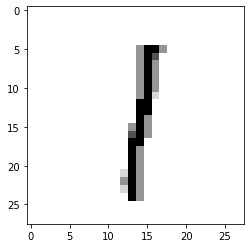

Le chiffre semble etre un 1 avec une certitude forte


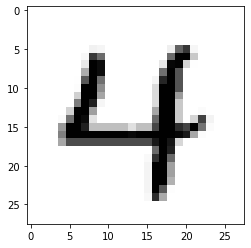

Le chiffre semble etre un 4 avec une certitude forte


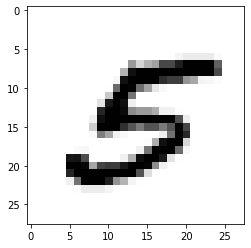

Le chiffre semble etre un 5 avec une certitude forte


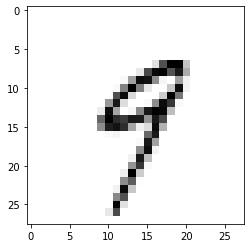

Le chiffre semble etre un 9 avec une certitude forte


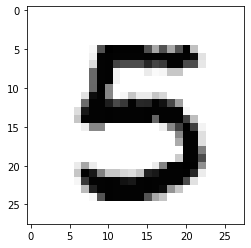

Le chiffre semble etre un 5 avec une certitude forte


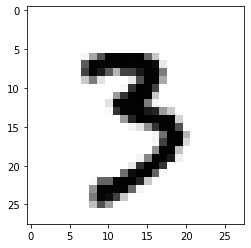

Le chiffre semble etre un 3 avec une certitude forte


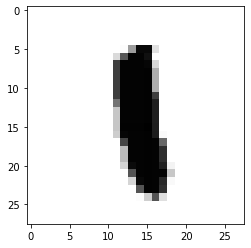

Le chiffre semble etre un 1 avec une certitude forte


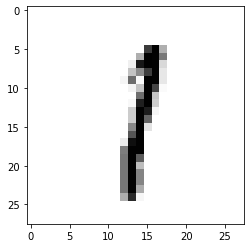

Le chiffre semble etre un 1 avec une certitude forte


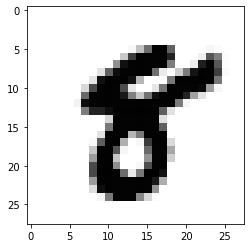

Le chiffre semble etre un 8 avec une certitude forte


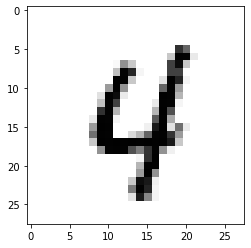

Le chiffre semble etre un 4 avec une certitude forte


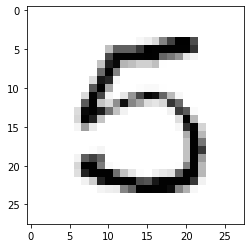

Le chiffre semble etre un 5 avec une certitude forte


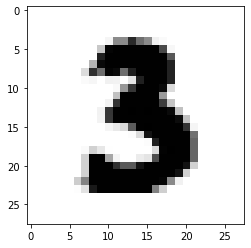

Le chiffre semble etre un 3 avec une certitude forte


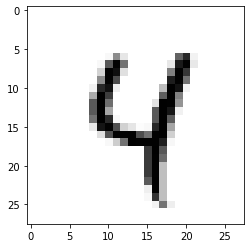

Le chiffre semble etre un 4 avec une certitude forte


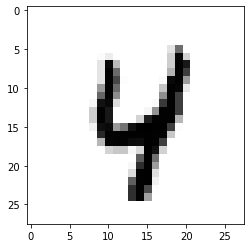

Le chiffre semble etre un 4 avec une certitude forte


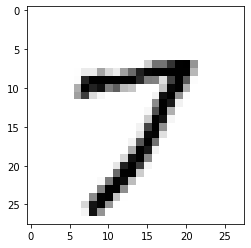

Le chiffre semble etre un 7 avec une certitude forte


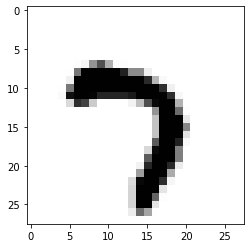

Le chiffre semble etre un 7 avec une certitude forte


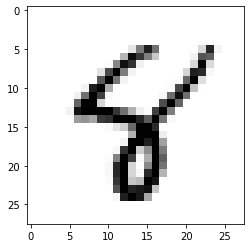

Le chiffre semble etre un 8 avec une certitude forte


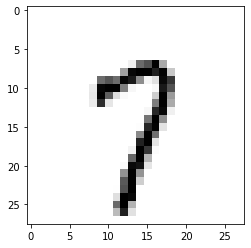

Le chiffre semble etre un 7 avec une certitude forte


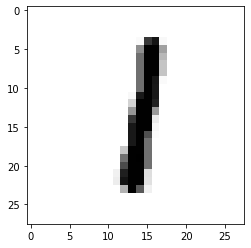

Le chiffre semble etre un 1 avec une certitude forte


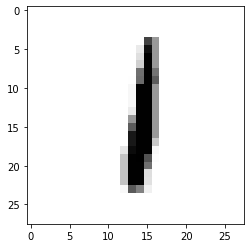

Le chiffre semble etre un 1 avec une certitude forte


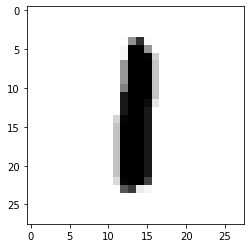

Le chiffre semble etre un 1 avec une certitude forte


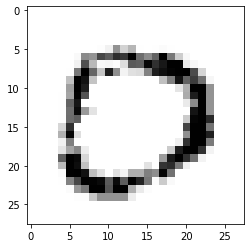

Le chiffre semble etre un 0 avec une certitude forte


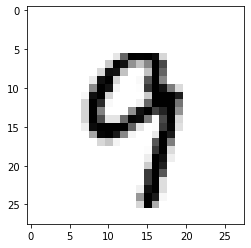

Le chiffre semble etre un 9 avec une certitude forte


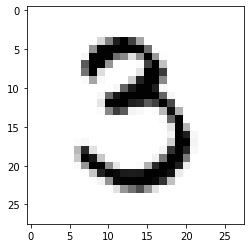

Le chiffre semble etre un 3 avec une certitude forte


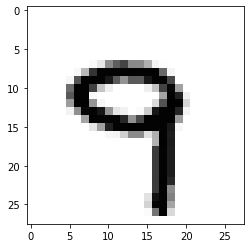

Le chiffre semble etre un 9 avec une certitude forte


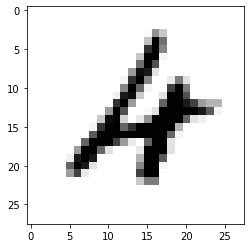

Le chiffre semble etre un 4 avec une certitude moyenne


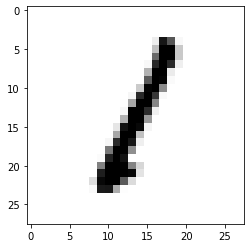

Le chiffre semble etre un 1 avec une certitude forte


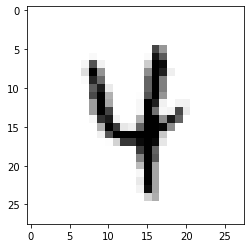

Le chiffre semble etre un 4 avec une certitude forte


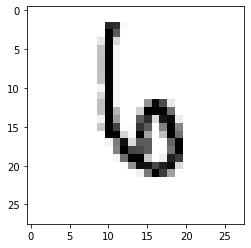

Le chiffre semble etre un 6 avec une certitude moyenne


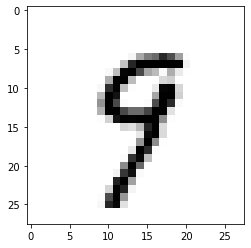

Le chiffre semble etre un 9 avec une certitude forte


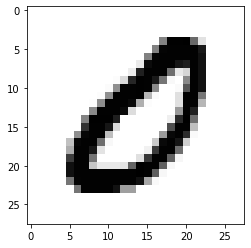

Le chiffre semble etre un 0 avec une certitude forte


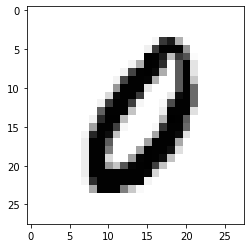

Le chiffre semble etre un 0 avec une certitude forte


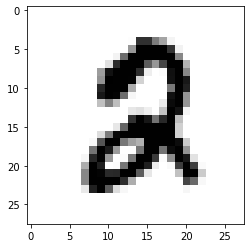

Le chiffre semble etre un 2 avec une certitude forte


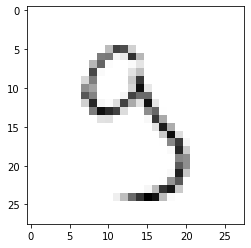

Le chiffre semble etre un 5 avec une certitude moyenne


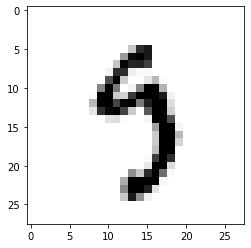

Le chiffre semble etre un 9 avec une certitude faible


In [0]:
certitude = ''
while certitude != 'faible':
  certitude = predire(x_test[random.randint(0,x_test.shape[0])])